# Predicting hospital readmission

## Problem statement

In recent decades, researchers have paid special attention to the readmission rate as it is considered a globally attractive and reliable indicator of the effectiveness and quality of hospital care provided to the patients. National health systems in many countries (e.g., the U.S.) began using the readmission rates as a publicly reported metric that can be used for hospital comparison and determination of hospital services reimbursement. Accurate forecasting of hospital readmissions can contribute significantly to the improvement of the quality of services provided by a specific hospital or by a health care system as a whole. The substantial health, economic and social benefits of such forecasting are undeniable. The benefits for the patients are related to the timely diagnosis and effective treatment of a health issue, the prevention of complications due to the delayed or incorrect treatment, and the shortening of hospitalization time while reducing potential psychological consequences. The number of readmissions to the total hospital admissions is a significant ratio, which can be used as a business intelligence (BI) tool to uncover service quality insights and improve patient care. 

In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from scipy.stats import stats
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sma
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, LassoCV, MultiTaskLasso, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score,mean_squared_error, cohen_kappa_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## Data Dictionary
age - age bracket of the patient

time_in_hospital- days (from 1 to 14)

n_procedures - number of procedures performed during the hospital stay

n_lab_procedures - number of laboratory procedures performed during the hospital stay

n_medications - number of medications administered during the hospital stay

n_outpatient - number of outpatient visits in the year before a hospital stay

n_inpatient - number of inpatient visits in the year before the hospital stay

n_emergency - number of visits to the emergency room in the year before the hospital stay

medical_specialty - the specialty of the admitting physician

diag_1 - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)

diag_2 - secondary diagnosis

diag_3 - additional secondary diagnosis

glucose_test - whether the glucose serum came out as high (> 200), normal, or not performed

A1Ctest - whether the A1C level of the patient came out as high (> 7%), normal, or not performed

change - whether there was a change in the diabetes medication ('yes' or 'no')

diabetes_med - whether a diabetes medication was prescribed ('yes' or 'no')

readmitted - if the patient was readmitted at the hospital ('yes' or 'no')


## 1. DATA UNDERSTANDING

In [4]:
# Importing and reading the file in the jupyter notebook
hosp_re=pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive (12)\\hospital_readmissions.csv")
hosp_re.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [5]:
hosp_re.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [6]:
# finding the dimensions of the data
hosp_re.shape

(25000, 17)

In [7]:
# finding the null values in data.
hosp_re.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [8]:
# Finding the data types of columns.
hosp_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

All the variables datatypes are correctly identified and assigned

#### Finding unique values,min,max and value counts for features.

In [9]:
hosp_re['readmitted'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
hosp_re['time_in_hospital'].unique()

array([ 8,  3,  5,  2,  1,  4,  7, 10,  6, 12, 11,  9, 14, 13],
      dtype=int64)

In [11]:
hosp_re['diag_1'].unique()

array(['Circulatory', 'Other', 'Injury', 'Digestive', 'Respiratory',
       'Diabetes', 'Musculoskeletal', 'Missing'], dtype=object)

In [12]:
print(hosp_re['age'].min())
print(hosp_re['age'].max())

[40-50)
[90-100)


In [13]:
hosp_re['age'].value_counts()


[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: age, dtype: int64

In [14]:
hosp_re['readmitted'].value_counts()

no     13246
yes    11754
Name: readmitted, dtype: int64

In [15]:
hosp_re['diag_1'].value_counts()

Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: diag_1, dtype: int64

In [16]:
hosp_re['time_in_hospital'].value_counts()

3     4311
2     3986
1     3480
4     3467
5     2542
6     1895
7     1467
8     1104
9      768
10     588
11     458
12     354
13     299
14     281
Name: time_in_hospital, dtype: int64

#### Finding out the data summary based on the overall statistics of each column

In [17]:
hosp_re.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [18]:
hosp_re.describe(include='object')

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246


#### plotting a heatmap to understand the significance between the variables.

<AxesSubplot:>

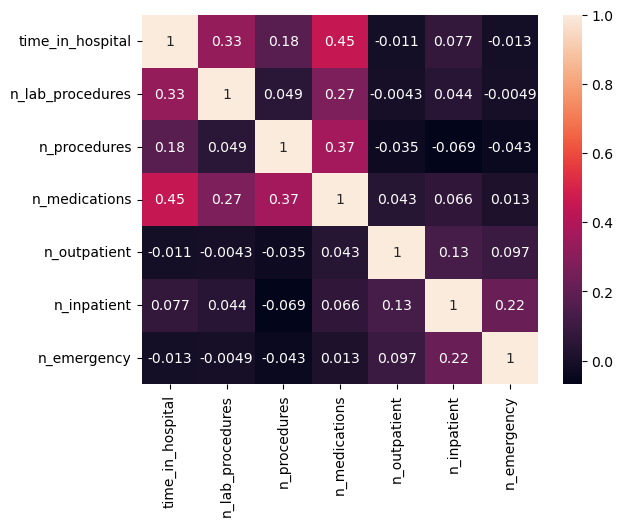

In [19]:
sns.heatmap(hosp_re .corr(),annot=True)

In [20]:
# selecting the numerical columns to find the outliers

hosp_re_num = hosp_re.select_dtypes(include = np.number)

hosp_re_cat = hosp_re.select_dtypes(include = np.object)

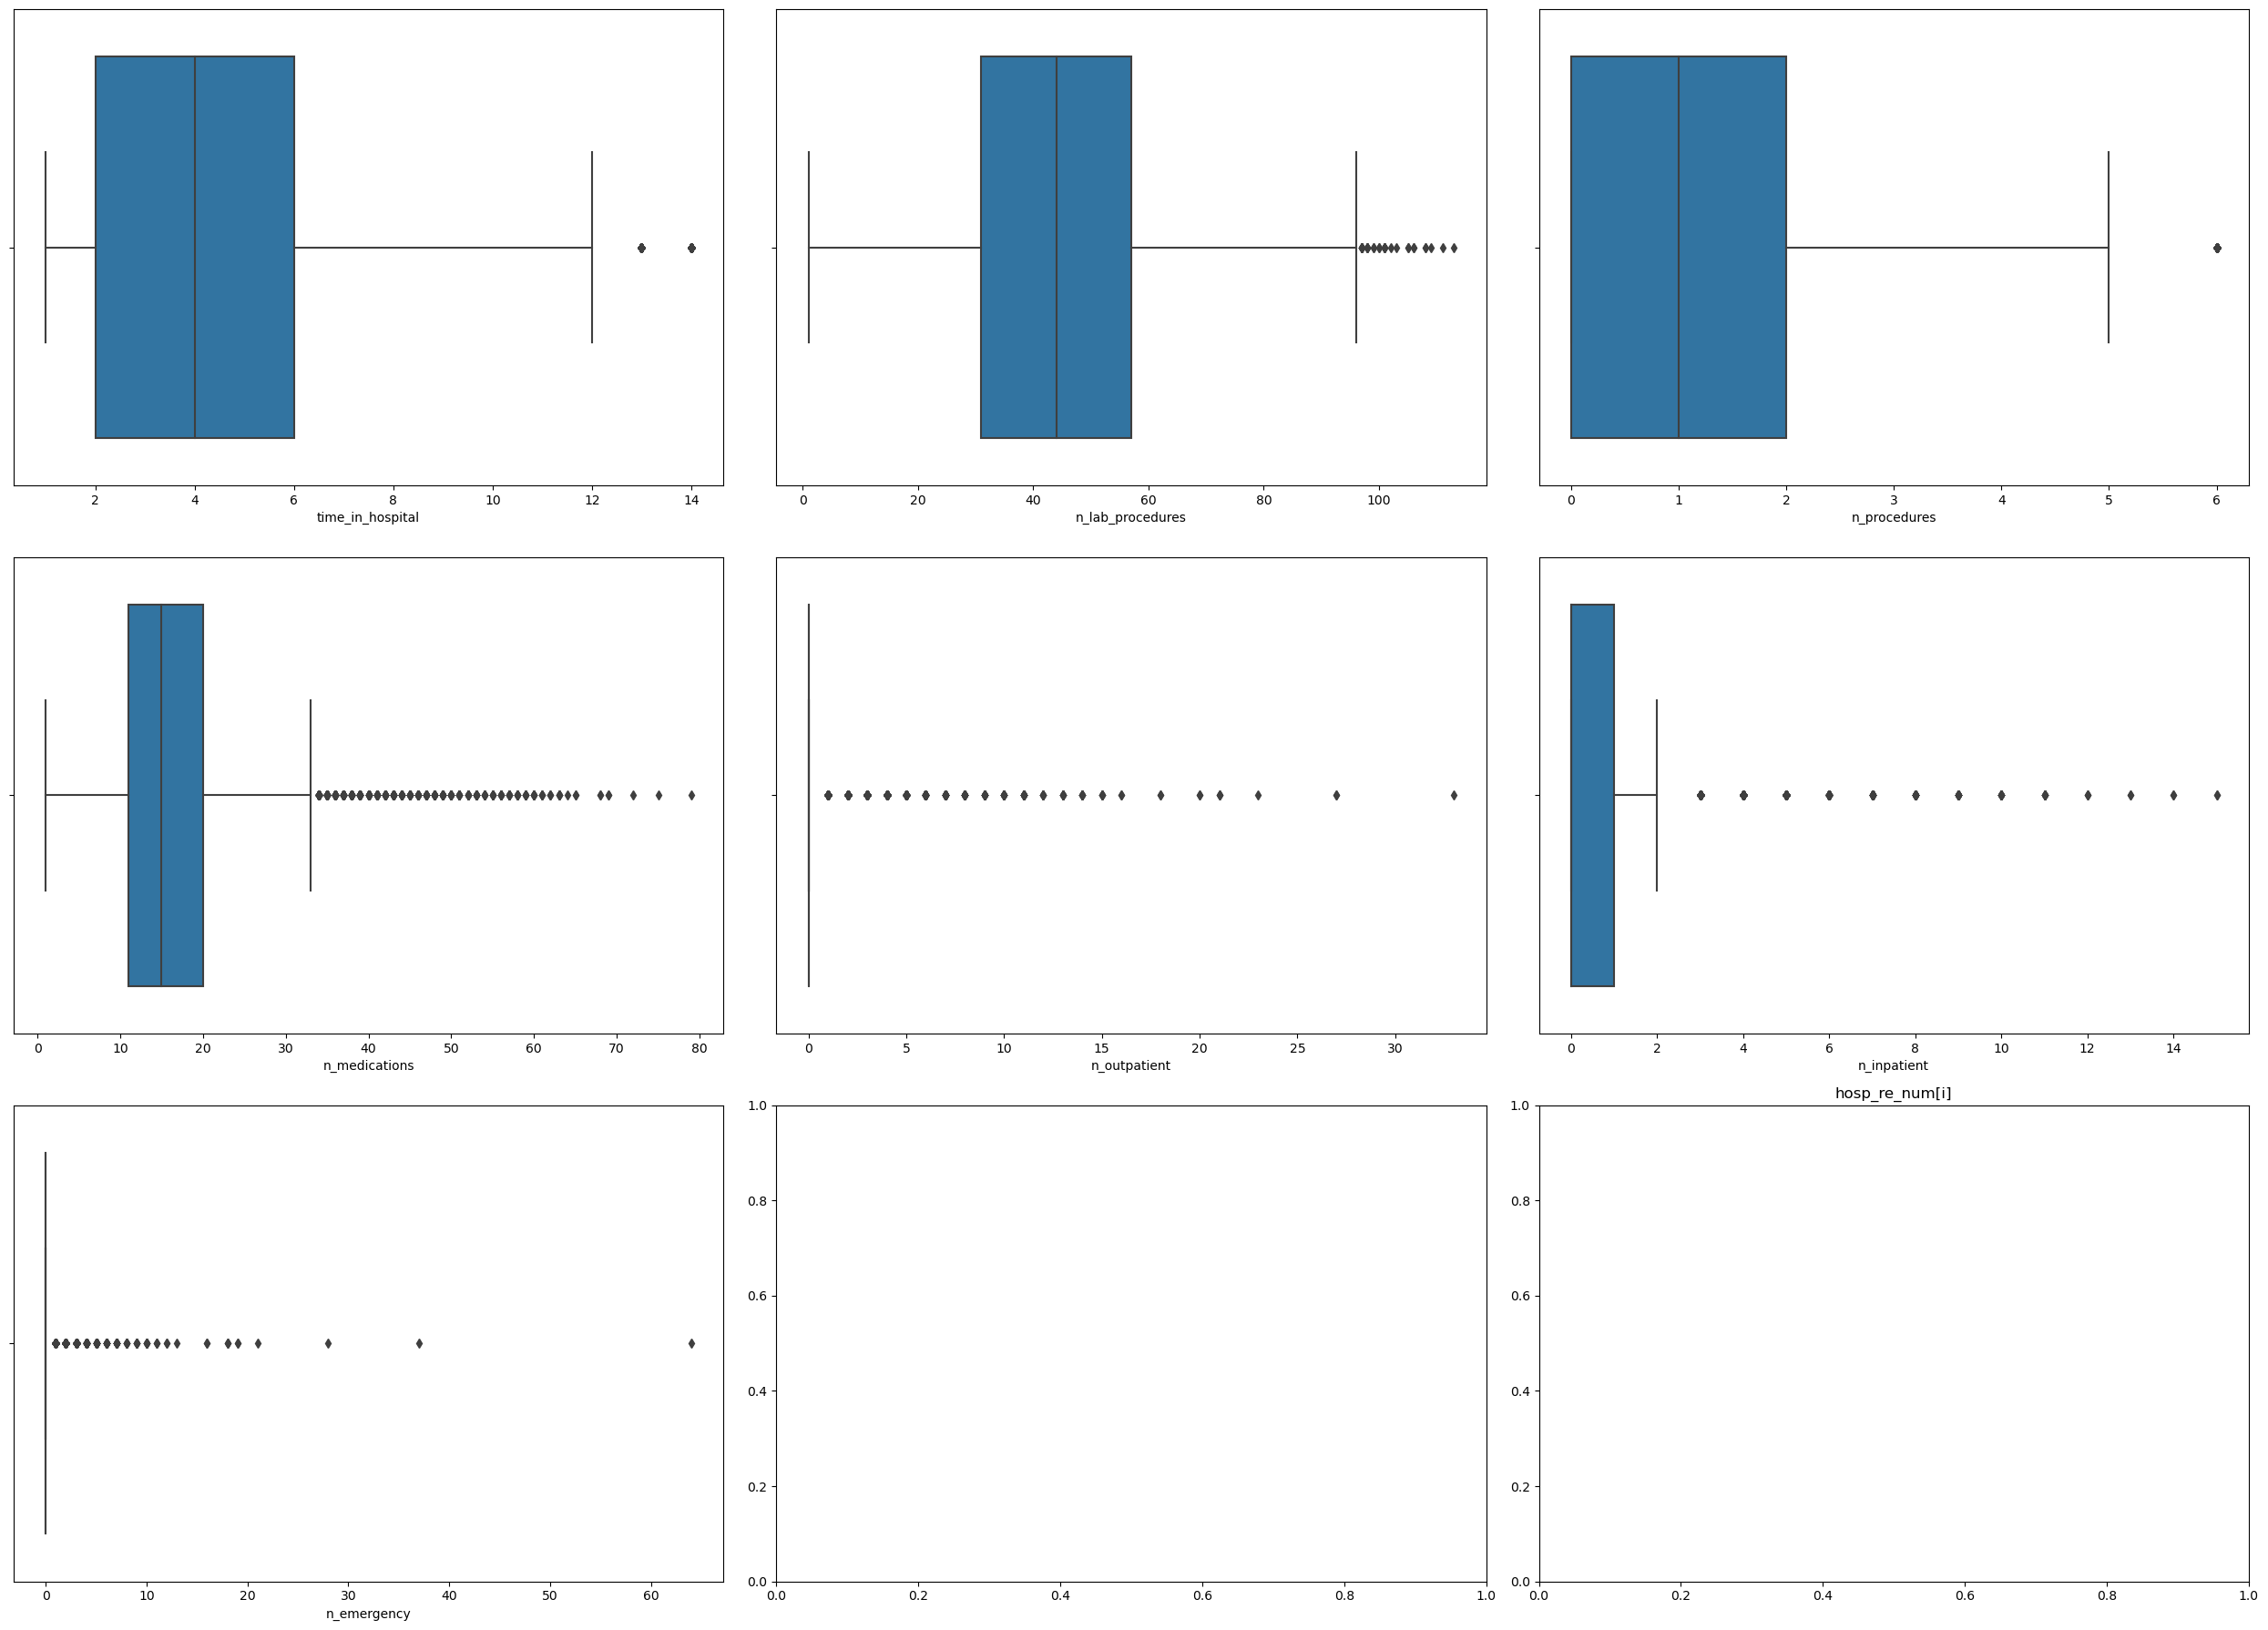

In [21]:
fig,ax = plt.subplots(3,3,figsize = (25,18))
for i,subplots in zip(hosp_re_num.columns,ax.flatten()):
    sns.boxplot(hosp_re_num[i],ax = subplots)
    plt.title('hosp_re_num[i]')
plt.tight_layout()
plt.show()

#### checking for distribution,skewness,kurtosis of the data

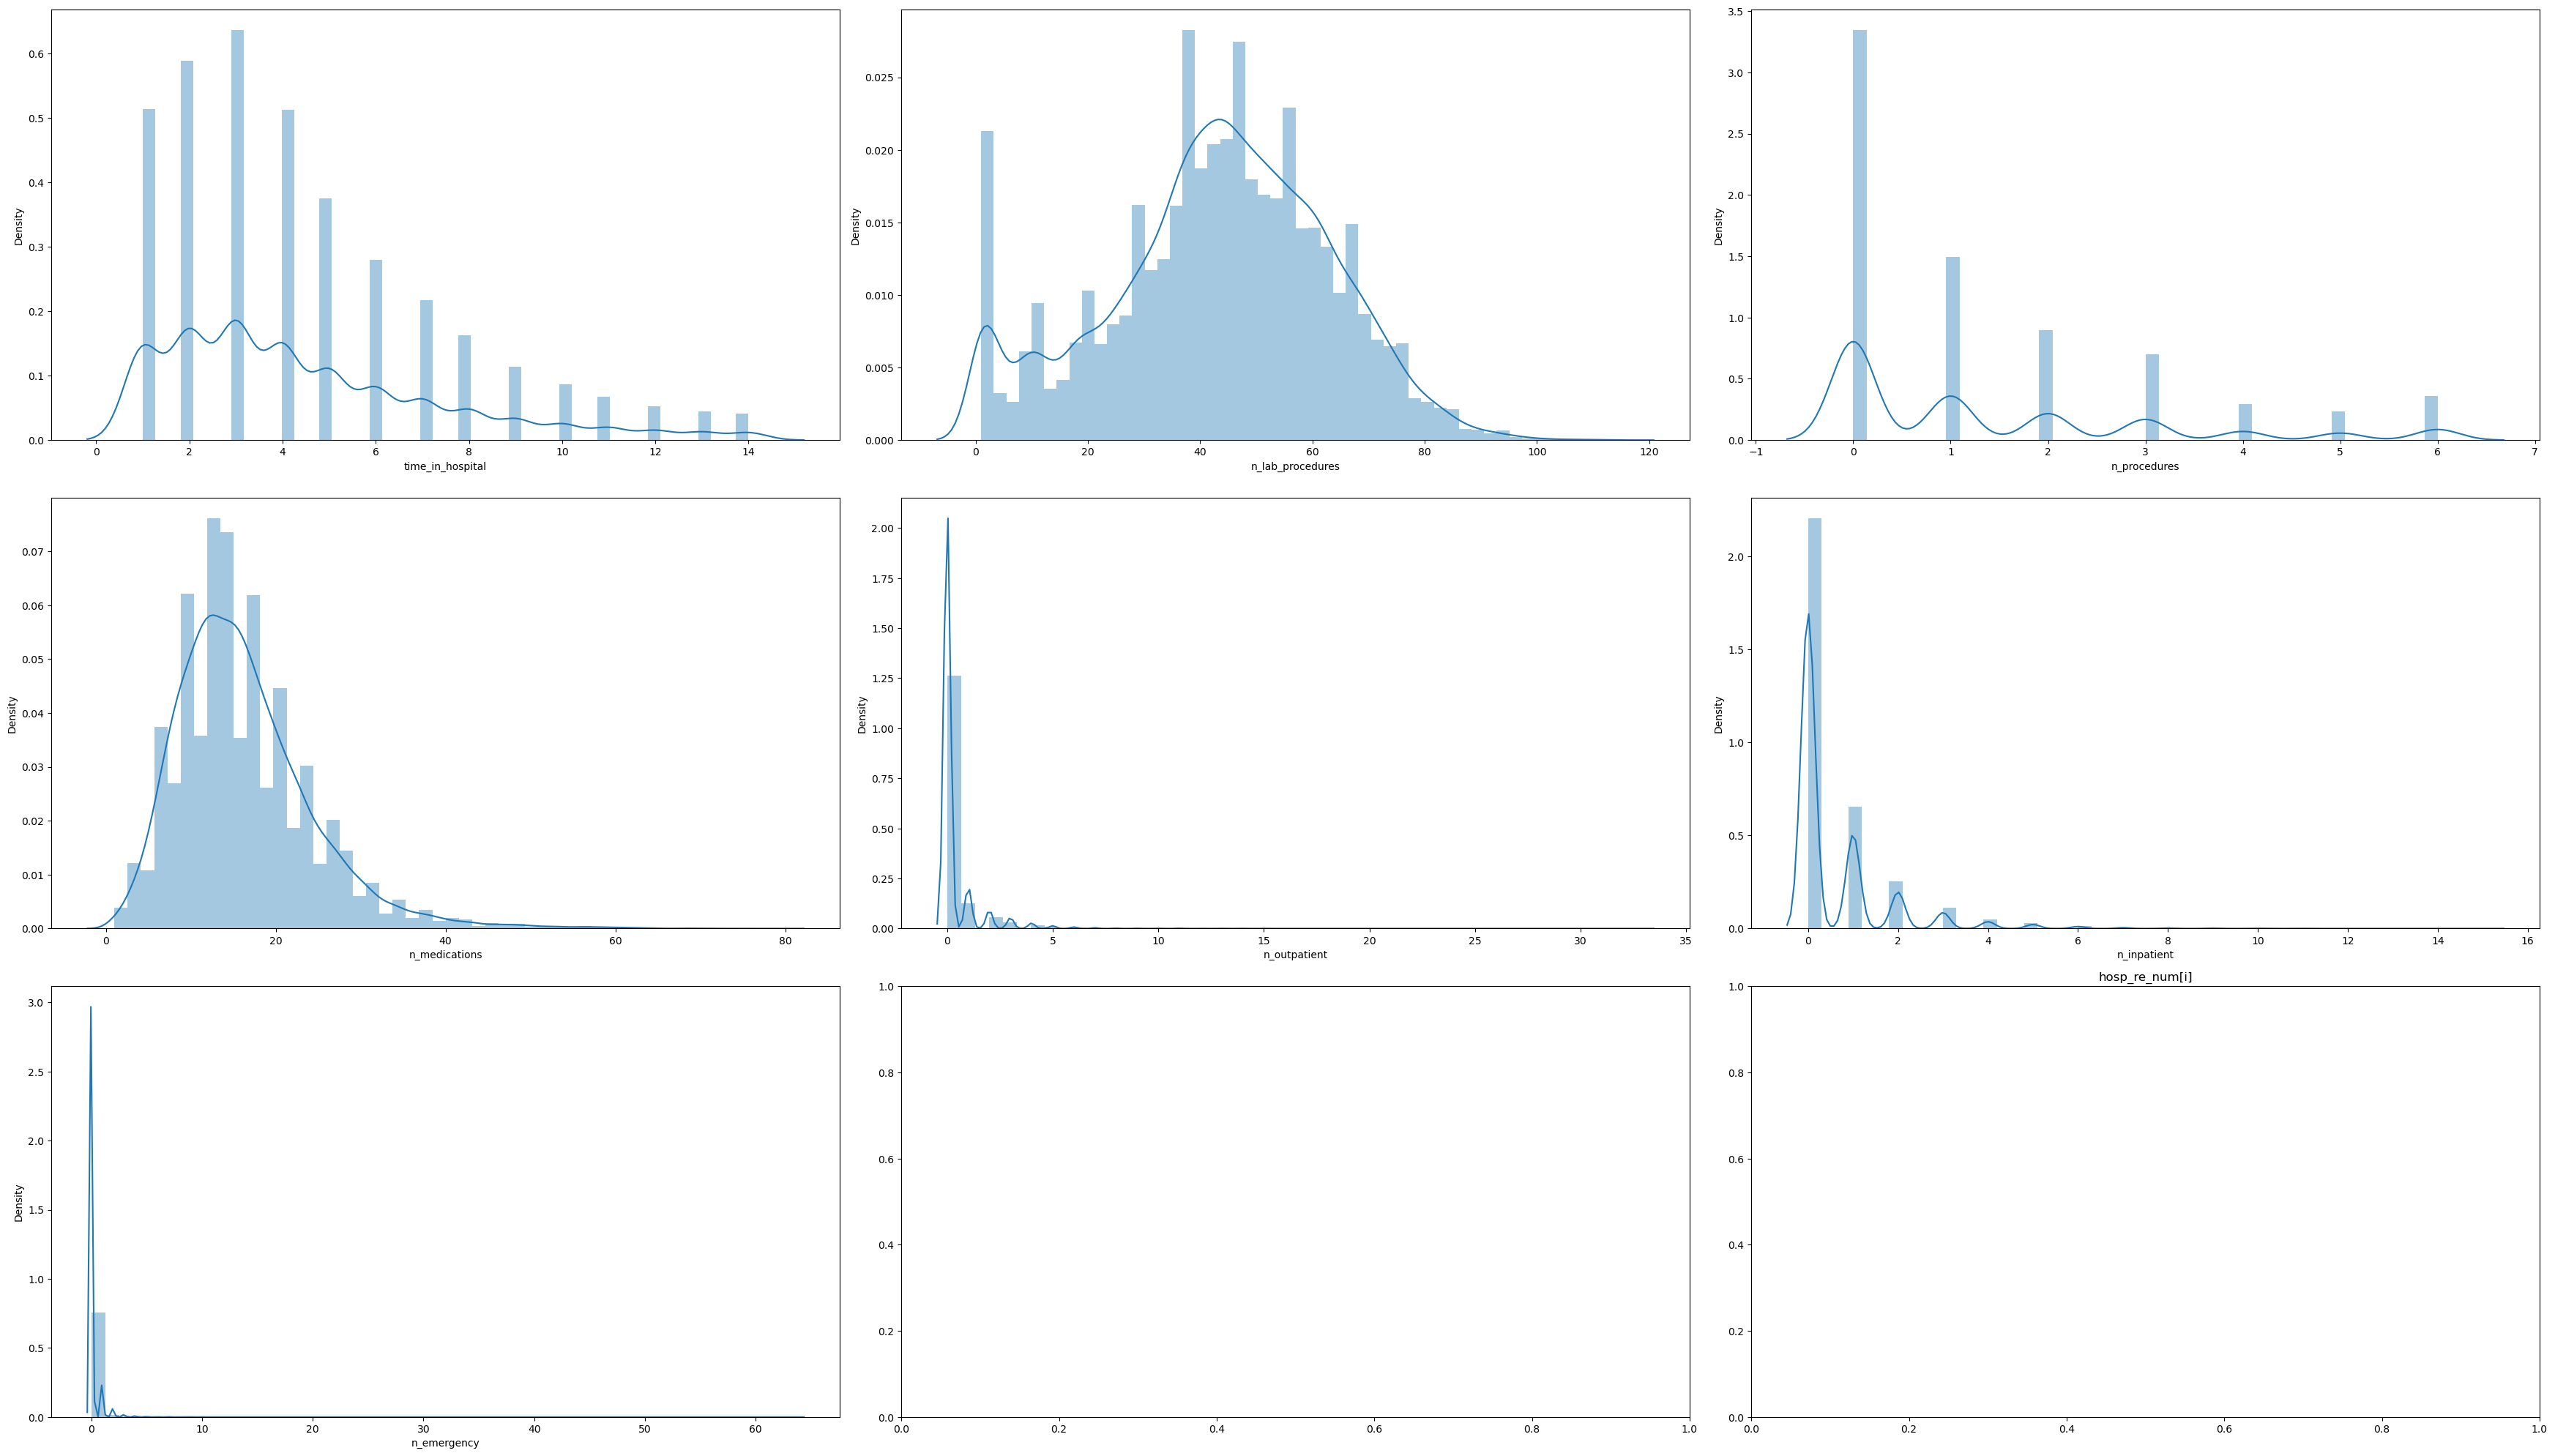

In [81]:
fig,ax = plt.subplots(3,3,figsize = (35,20))
for i,subplots in zip(hosp_re_num.columns,ax.flatten()):
    sns.distplot(hosp_re_num[i],ax = subplots)
    plt.title('hosp_re_num[i]')
plt.tight_layout()
plt.show()

In [23]:
hosp_re.skew()

time_in_hospital     1.108905
n_lab_procedures    -0.238672
n_procedures         1.300572
n_medications        1.316139
n_outpatient         7.302605
n_inpatient          3.254634
n_emergency         24.530152
dtype: float64

In [24]:
hosp_re.kurt()

time_in_hospital       0.800598
n_lab_procedures      -0.297922
n_procedures           0.795567
n_medications          3.476595
n_outpatient          95.925322
n_inpatient           16.454233
n_emergency         1310.593302
dtype: float64

#### Finding the distribution of data in the target variable

Count of values in each class of target variable(readmitted) : 
 no     13246
yes    11754
Name: readmitted, dtype: int64 

AxesSubplot(0.22375,0.11;0.5775x0.77)


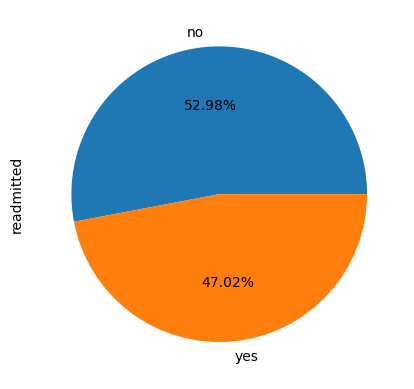

In [25]:
print('Count of values in each class of target variable(readmitted) :','\n',hosp_re['readmitted'].value_counts(),'\n')
print(hosp_re['readmitted'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%'))
plt.show()

In [26]:
hosp_re_num.std()

time_in_hospital     3.001470
n_lab_procedures    19.818620
n_procedures         1.715179
n_medications        8.060532
n_outpatient         1.195478
n_inpatient          1.177951
n_emergency          0.885873
dtype: float64

#### encoding the data

In [27]:
hosp_re_enc = pd.get_dummies(hosp_re,drop_first=True)
hosp_re_enc.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_[50-60),age_[60-70),age_[70-80),...,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,8,72,1,18,2,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
1,3,34,2,13,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
2,5,45,0,18,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,1
3,2,36,0,12,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,1,1
4,1,42,0,7,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,0


In [28]:
hosp_re_enc.shape

(25000, 46)

### BASE MODEL (ORIGINAL DATA) 

In [29]:
# Identifying the dependent and independent variables.

X = hosp_re_enc.drop('readmitted_yes',axis = 1)
Y = hosp_re_enc['readmitted_yes']

In [30]:
# performing train test split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
print('xtrain dimensions :',x_train.shape)
print('ytrain dimensions :',y_train.shape)
print('xtest dimensions :', x_test.shape)
print('ytest dimensions :',y_test.shape)

xtrain dimensions : (17500, 45)
ytrain dimensions : (17500,)
xtest dimensions : (7500, 45)
ytest dimensions : (7500,)


In [34]:
dt_base = DecisionTreeClassifier(random_state=1)

dt=dt_base.fit(x_train,y_train)

trainpred_dt = dt_base.predict(x_train)
testpred_dt = dt_base.predict(x_test)
prob = dt_base.predict_proba(x_test)
dt_base_pred_prob = prob[:,1]

In [36]:
print('Accuracy table for train data :','\n',classification_report(y_train,trainpred_dt),'\n')
print('Accuracy table for test data :','\n',classification_report(y_test,testpred_dt),'\n')

Accuracy table for train data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9226
           1       1.00      1.00      1.00      8274

    accuracy                           1.00     17500
   macro avg       1.00      1.00      1.00     17500
weighted avg       1.00      1.00      1.00     17500
 

Accuracy table for test data : 
               precision    recall  f1-score   support

           0       0.57      0.55      0.56      4020
           1       0.50      0.52      0.51      3480

    accuracy                           0.54      7500
   macro avg       0.53      0.53      0.53      7500
weighted avg       0.54      0.54      0.54      7500
 



In [37]:
dt_pred_prob=dt.predict_proba(x_test)[:,1]

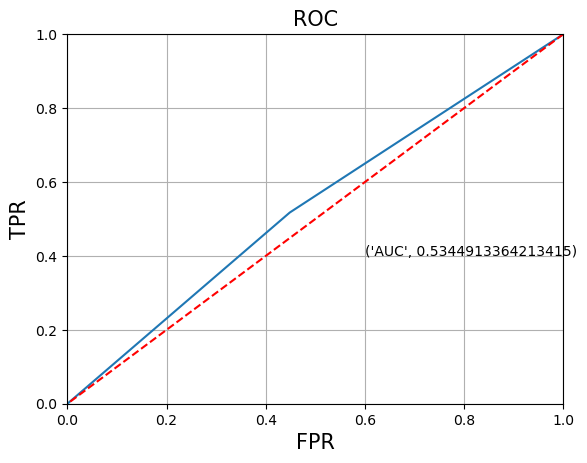

In [38]:
fpr,tpr,threshold=roc_curve(y_test,dt_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([1,0],[1,0],'r--')
plt.title('ROC',fontsize=15)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)

auc=roc_auc_score(y_test,dt_pred_prob)
plt.text(x=0.6,y=0.4,s=('AUC',auc))
plt.grid()

In [53]:
# important features according to the base decision tree model on the whole data.

important_features = pd.DataFrame({'Features': x_train.columns,
                                  'importance': dt_base.feature_importances_})

important_features.sort_values('importance',ascending = False)

,Features,importance
1,n_lab_procedures,0.181347
3,n_medications,0.136823
0,time_in_hospital,0.088633
2,n_procedures,0.055182
5,n_inpatient,0.053481
37,diag_3_Other,0.025004
30,diag_2_Other,0.024985
15,medical_specialty_Missing,0.024525
43,change_yes,0.022327
23,diag_1_Other,0.021946


In [55]:
important_features=important_features.sort_values('importance',ascending=False)

<AxesSubplot:xlabel='importance', ylabel='Features'>

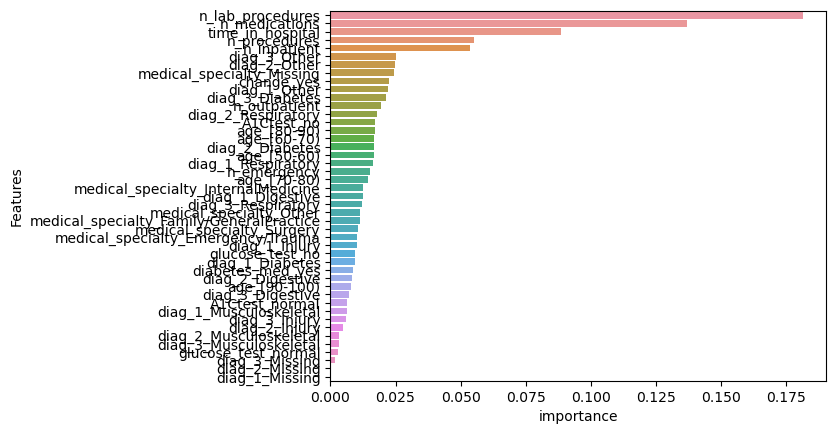

In [56]:
sns.barplot(x="importance",y="Features",data=important_features)

<AxesSubplot:xlabel='readmitted', ylabel='count'>

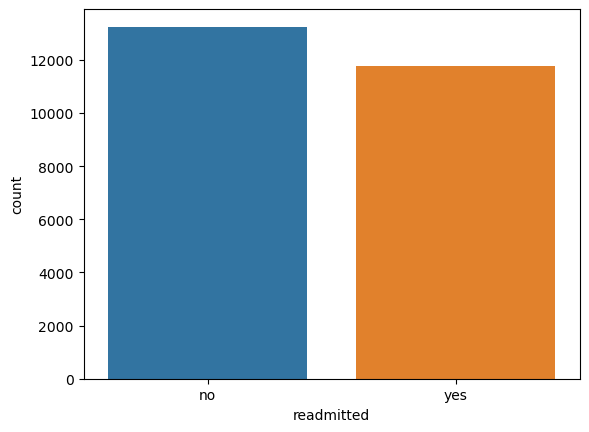

In [43]:
sns.countplot(hosp_re['readmitted'])

#### Hyperparameter tuning

In [44]:
tuned_parameters=[{'criterion':['entropy','gini'],
                   'max_depth':range(2,5),
                   'max_features':['sqrt','log2'],
                   'min_samples_split':range(2,5),
                   'min_samples_leaf':range(1,5),
                   'max_leaf_nodes':range(2,5)}]
dt_class=DecisionTreeClassifier(random_state=10)

tree_grid=GridSearchCV(estimator=dt_class,param_grid=tuned_parameters,cv=3)

tree_grid_model=tree_grid.fit(x_train,y_train)

print('Best parameters for decision tree classifier:',tree_grid_model.best_params_,'\n')

Best parameters for decision tree classifier: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [46]:
dt_model= DecisionTreeClassifier(criterion='entropy' ,max_depth= 2,max_features='log2' ,min_samples_split= 2,
                                min_samples_leaf= 1,max_leaf_nodes= 4)

dt_model=dt_model.fit(x_train,y_train) 

In [47]:
train_pred=dt_model.predict(x_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68      9226
           1       0.62      0.38      0.47      8274

    accuracy                           0.60     17500
   macro avg       0.61      0.59      0.58     17500
weighted avg       0.61      0.60      0.58     17500



In [48]:
test_pred=dt_model.predict(x_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68      4020
           1       0.61      0.39      0.48      3480

    accuracy                           0.60      7500
   macro avg       0.61      0.59      0.58      7500
weighted avg       0.60      0.60      0.59      7500



### Random forest model

In [57]:
rf_classification =RandomForestClassifier(n_estimators=10,random_state=10)

# use fit() to fit the model on the train data
rf_model=rf_classification.fit(x_train,y_train)

In [58]:
train_pred=rf_model.predict(x_train)

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9226
           1       0.99      0.97      0.98      8274

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [59]:
test_pred=rf_model.predict(x_test)

print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64      4020
           1       0.56      0.45      0.50      3480

    accuracy                           0.58      7500
   macro avg       0.58      0.57      0.57      7500
weighted avg       0.58      0.58      0.58      7500



#### Hyperparameter tuning

In [60]:
tuned_parameters=[{'criterion':['entropy','gini'],
                   'n_estimators':[10,30,50,70,90],
                   'max_depth':[5,10,15],
                   'min_samples_split':[2,5,8]}]
random_forest_classification=RandomForestClassifier(random_state=10)

In [61]:
rf_grid=GridSearchCV(estimator=random_forest_classification,param_grid=tuned_parameters,cv=5)

rf_grid_model=rf_grid.fit(x_train,y_train)

print('Bes parameters for random forest classifier:',rf_grid_model.best_params_)

Bes parameters for random forest classifier: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 90}


In [70]:
rf_classification = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 5, n_estimators= 90, random_state=100)

rf_model = rf_classification.fit(x_train,y_train) 

In [71]:
train_pred = rf_model.predict(x_train)

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      9226
           1       0.86      0.68      0.76      8274

    accuracy                           0.80     17500
   macro avg       0.81      0.79      0.79     17500
weighted avg       0.81      0.80      0.79     17500



In [74]:
test_pred_rf = rf_model.predict(x_test)

print(classification_report(y_test, test_pred))
print('The Cohen kappa score of the model :',cohen_kappa_score(y_test,test_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67      4020
           1       0.60      0.50      0.54      3480

    accuracy                           0.62      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.61      0.62      0.61      7500

The Cohen kappa score of the model : 0.2172458775853947


#### Gradient boosting model

In [65]:
gb_model = GradientBoostingClassifier(n_estimators=200,random_state=1)

gb_model.fit(x_train,y_train)

trainpred_gb = gb_model.predict(x_train)
testpred_gb = gb_model.predict(x_test)
prob4 = gb_model.predict_proba(x_test)
predproba_gb = prob4[:,1]

print('Accuracy table of train data :','\n',classification_report(y_train,trainpred_gb),'\n')
print('Accuracy table of test data :','\n',classification_report(y_test,testpred_gb),'\n')
print('The Cohen kappa score of the model :',cohen_kappa_score(y_test,testpred_gb))

Accuracy table of train data : 
               precision    recall  f1-score   support

           0       0.64      0.77      0.69      9226
           1       0.66      0.51      0.58      8274

    accuracy                           0.65     17500
   macro avg       0.65      0.64      0.64     17500
weighted avg       0.65      0.65      0.64     17500
 

Accuracy table of test data : 
               precision    recall  f1-score   support

           0       0.63      0.73      0.67      4020
           1       0.61      0.50      0.55      3480

    accuracy                           0.62      7500
   macro avg       0.62      0.61      0.61      7500
weighted avg       0.62      0.62      0.62      7500
 

The Cohen kappa score of the model : 0.2296069882276779


#### BUSINESS INTERPRETATION :

1. Model performance - 
   
   - The Random Forest Algorithm uses feature similarity to identify and determine the prediction of the datapoints.
   - The algorithm identifes and understands the patterns in the training set of the data based on which the test datapoints get predicted for the classes.
      
    - Model Evaluation :
      - The model was evaluated by creating classification report deriving the precision, recall, f1-score, accuracy of the training and test data.
      - Looking at the accuracy score it can be said that the model is a goodfit with not much difference for train and test data accuracy at 0.80 and 0.62 respectively.
      1. Precision : determines the number of correct outputs are provided by the model. Out of all the predicted values it gives us the ratio for how many of them were actually true.
         - In this case the precision of the model is shows higher precision for class 1 than class 0.
      2. Recall : gives us the ratio that out of all the positive classes how many of them were correctly predicted by our model.
         - For our above model, the recall is higher for class 0 in train and test set, for class 1 it is higher for train set but comparatively lower for training set. This indicates that the actual positive values for class 0 is being more accurately predicted by the model.
      3. F-1 score : f1 score gives us the score by evaluating the precision and recall measures at the same time.
         - The f1 score here is pretty high for train and test set as for both the classes.

2. Business interpretation :
    
    - Looking at the precision values, it was observed that the possibility of the value predicted as 0 is lesser than that of the class 1 . We can say that the model is predicting patient is readmitted to hospital activities well.
    - Since the recall values show a better result for class 0 and precision values show a better result for class 1 we'll consider the f1 score as a measure for evaluating the accuracy. Here the f1 score as well shows a good measure for training and test set of class 0 and training set of class 1. But a comaparatively lower score for test set of class 1. 

This can be interpreted as -
1. The model is giving a good performance for the prediction of patient is readmitted to hospital or not.
2. Although the evaluations showcase that there is a lower recall value for readmitted being actually true, it is still high considering that the happenings of not admitted are also lower, and the data itself had a lesser number of active readmitted datapoints present.
3. Overall it can be said that the model is good fit model.

In [78]:
hosp_re_num.columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')

In [79]:
hosp_re_cat.columns

Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')